In [1]:
import sys
sys.path.append("/Users/ashish/Desktop/ml/src/python") #  for locating custom library, not available in Jupyter( available in intellij)
from lib import *

print(os.listdir("../data")) # this will list files in input directory


['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']
['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']


# Load Data

In [2]:
raw_train,raw_test = load_data()
print(raw_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
raw_test.info() # nulls in Age, Cabin and embarked ( same as train data), here in Fare Also
raw_test.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


We are merging data together, so we can process data, after feature engineering we will split 

In [4]:
data=pd.concat([raw_train, raw_test], axis=0).reset_index(drop=True) # concatinating test and train removing index
print(data.info()) # output class will be Nan For test data
data.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007


# Visualization & Data Cleaning

Null Sum :  0
Value Counts:
 Gable      2310
Hip        551 
Gambrel    22  
Flat       20  
Mansard    11  
Shed       5   
Name: RoofStyle, dtype: int64


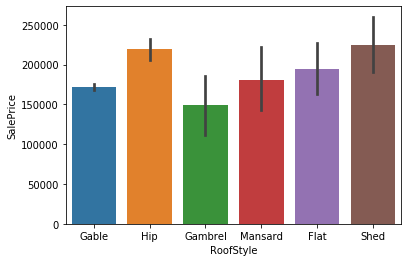

In [9]:
showColInfo(data,'RoofStyle')
sns.barplot(x='RoofStyle',y='SalePrice', data=data)

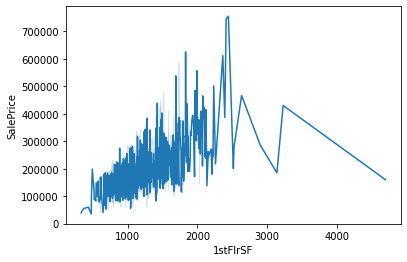

In [15]:
#combining 1stFlrSF, 2ndFlrSF and 3SsnPorch
# showColInfo(data,'3SsnPorch')
sns.lineplot(x='1stFlrSF', y='SalePrice', data=data)


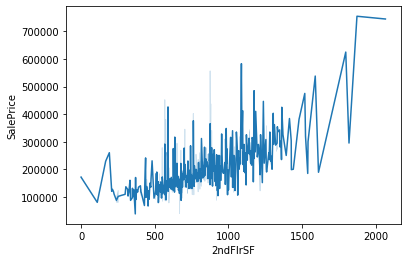

In [16]:
sns.lineplot(x='2ndFlrSF', y='SalePrice', data=data)


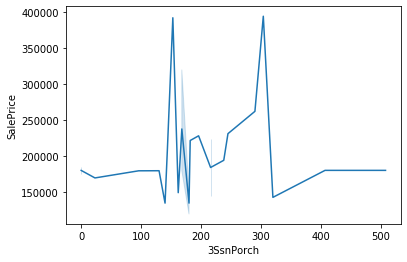

In [17]:
sns.lineplot(x='3SsnPorch', y='SalePrice', data=data)


### Embarked

In [ ]:
data['Embarked'].isnull().sum()

In [ ]:
data['Embarked'].value_counts() # embarked - from where, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
data[data['Embarked'].isnull()]

In [ ]:
 sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=data) # relation between Embarked and Fare for each Class


In [ ]:
sns.barplot(x='Embarked',y="Survived",data=data)

In [ ]:
data['Embarked']=data['Embarked'].fillna('C')

### Fare

In [ ]:
data[data['Fare'].isnull()]

In [ ]:
fare=data[(data['Age'] >60) & (data['Embarked'] == "S") & (data['Pclass'] == 3)].Fare # find all fares matching condition
data['Fare']=data['Fare'].fillna(fare.median()) # find media and assign

In [ ]:
sns.kdeplot(data.loc[data['Survived'] == 0, 'Fare'], label='Died')
sns.kdeplot(data.loc[data['Survived'] == 1, 'Fare'], label='Survived')

### Name

In [ ]:
data.Name

In [ ]:
# Get Title from Name
data["Title"] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data["Title"].value_counts()

In [ ]:
data["Title"] = data["Title"].replace(['Mlle','Ms'], 'Miss')
data["Title"] = data["Title"].replace(['Mme'], 'Mrs')
data["Title"] = data["Title"].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt'], 'Officer')
data["Title"] = data["Title"].replace(['the Countess', 'Don', 'Lady', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
data["Title"].value_counts()

In [ ]:
sns.barplot(x="Title", y="Survived", data=data)

### Parch & SibSp

In [ ]:
# Create a family size descriptor from SibSp and Parch
data["Fsize"] = data["SibSp"] + data["Parch"] + 1
sns.factorplot(x="Fsize",y="Survived",data = data)

In [ ]:
# Create new feature of family size
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
data['FamilyLabel']=data['Fsize'].apply(Fam_label)

In [ ]:
sns.barplot(x="FamilyLabel", y="Survived", data=data)

### Pclass

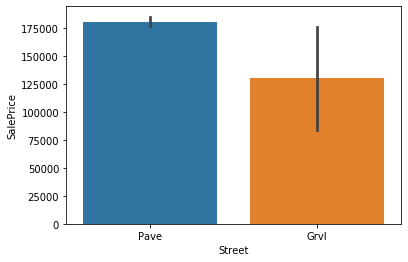

In [33]:
sns.barplot(x="Street", y="SalePrice", data=data)

### Sex

In [ ]:
### Ticket

In [ ]:
Ticket_Count = dict(data['Ticket'].value_counts())
data['TicketGroup'] = data['Ticket'].apply(lambda x:Ticket_Count[x])
data['TicketGroup'].value_counts() # group ticket by count of sales

def Ticket_Label(s): # group all having same survival together
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

data['TicketGroup'] = data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=data)

In [ ]:
data.info()

In [ ]:
age_df = data[['Age', 'Pclass','Sex','Title','Fsize']]

# get_dummies() only works on strings, and convert to one-hot encoding
# here it will only work on String columns ( Sex(male/female) and title)
age_df=pd.get_dummies(age_df) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
age_df.head()

In [ ]:
age_df[age_df.Age.notnull()].as_matrix()# converts df into 2d matrix/ as below

In [ ]:
known_age = age_df[age_df.Age.notnull()].as_matrix() # Rows with known age
unknown_age = age_df[age_df.Age.isnull()].as_matrix() # Rows with unknown age
y = known_age[:, 0] # age columns
X = known_age[:, 1:] # all other columns
X

In [ ]:
#predicting ages for unknown using XGBoost
rfr=xgboost.XGBClassifier()
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
predictedAges[:10]

In [ ]:
data.loc[(data.Age.isnull()), 'Age' ] = predictedAges #put predicted ages where it was null
data.head()

# Modeling

In [ ]:
data.info()

In [ ]:
data.head(1)

In [ ]:
#choosing required columns and converting to 0/1 for strings
data=data[['Survived','Age','Cabin','Embarked','Fare','Pclass','Sex','TicketGroup','FamilyLabel','Title']]
data=pd.get_dummies(data)
data.head()

In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
train=data[:len(raw_train)] # take train data
test=data[len(raw_train):].drop(['Survived'],axis=1) # take test data
x = train.drop(['Survived'],axis=1)
y = train.Survived

In [ ]:
model = ensemble.RandomForestClassifier(random_state = 10, 
                                      warm_start = True,
                                      n_estimators = 26, 
                                      max_depth = 6, 
                                      max_features = 'sqrt')
model.fit(x,y)

In [ ]:
predictions = model.predict(test)
submission = pd.DataFrame({"PassengerId": raw_test["PassengerId"],
                           "Survived": predictions.astype(np.int32)})
submission.to_csv("../ouput/output.csv", index=False)
